In [1]:
import pandas as pd
import numpy as np

In [2]:
# Seed for reproducibility
np.random.seed(42)
rows = 200

In [3]:
data = {
    'sleep_hours': np.random.uniform(4, 10, rows),
    'screen_time': np.random.uniform(1, 9, rows),
    'physical_activity': np.random.randint(0, 90, rows),
    'work_hours': np.random.uniform(2, 12, rows),
    'social_interaction': np.random.randint(1, 11, rows),
    'caffeine_intake': np.random.randint(0, 6, rows)
}

In [4]:
df = pd.DataFrame(data)

In [5]:
# Logic-based Mood Assignment (Simplified Target Logic)
def assign_mood(row):
    score = (row['sleep_hours'] * 0.4) + (row['physical_activity'] * 0.05) + \
            (row['social_interaction'] * 0.2) - (row['work_hours'] * 0.2) - (row['screen_time'] * 0.1)
    
    if score > 4.5: return 'Happy'
    elif score > 3.0: return 'Neutral'
    elif score > 1.5: return 'Stressed'
    else: return 'Sad'

In [6]:
df['mood'] = df.apply(assign_mood, axis=1)
df.to_csv('../data/mood_data.csv', index=False)
print("Dataset created and saved to data/mood_data.csv")

Dataset created and saved to data/mood_data.csv


C:\Users\mksme\AppData\Local\Temp\ipykernel_30440\2004655931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mood', data=df, palette='viridis')


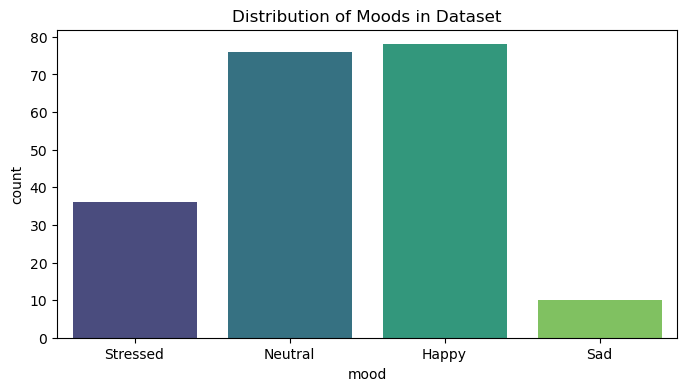

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check how many of each mood we have
plt.figure(figsize=(8, 4))
sns.countplot(x='mood', data=df, palette='viridis')
plt.title('Distribution of Moods in Dataset')
plt.show()

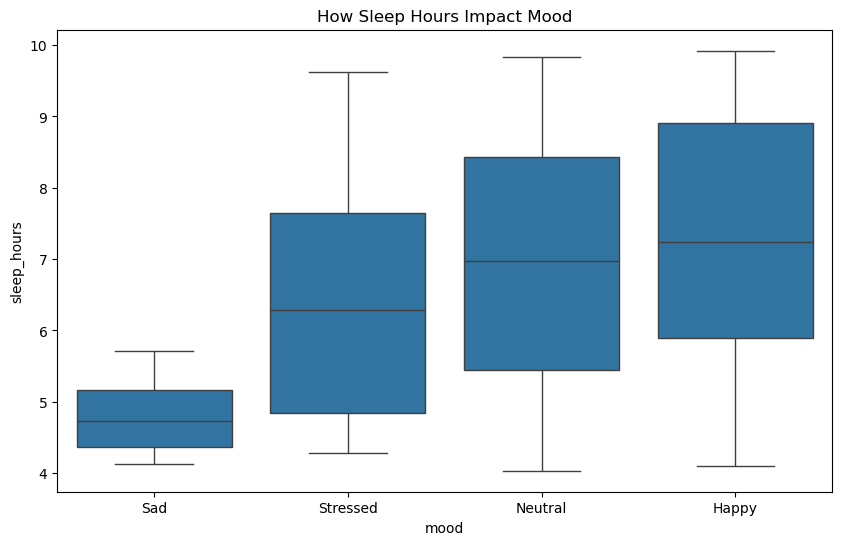

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mood', y='sleep_hours', data=df, order=['Sad', 'Stressed', 'Neutral', 'Happy'])
plt.title('How Sleep Hours Impact Mood')
plt.show()

In [ ]:
# We'll pick a few key features to keep the grid readable
sns.pairplot(df, vars=['sleep_hours', 'work_hours', 'physical_activity'], hue='mood')
plt.show()